In [1]:
import os
print(os.getcwd())

# os.chdir(r'C:/Users/user/Desktop/Hevrin Data') # r is a raw string, not read as an escape sequence
# os.chdir(r'C:/Users/user/Desktop/Capstone2') 
# os.listdir(r'/Users/user/Desktop/Capstone2 ')


/Users/user/Desktop


In [2]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# This web site can tell you that there is a Nan somewhere in your json file. https://jsonlint.com/
# The workaround is to read it as a string then use json.loads (which handles nan). Example code below should work:

file=open('ultimate_data_challenge.json', 'r')
file_content=file.read()
file.close()
data= json.loads(file_content)
df= pd.DataFrame(data)

In [4]:
df.head(20)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [6]:
df.city.nunique() # only three cities (to be converted to a categorical variable later)

3

In [7]:
df['last_trip'] = pd.to_datetime(df.last_trip_date)
df.last_trip.max()   # Timestamp('2014-07-01 00:00:00'), so June 30th is the cut-off date for "active"

Timestamp('2014-07-01 00:00:00')

In [8]:
# creating labels
# df['DOB1'] = df['DOB'].dt.strftime('%m/%d/%Y')
# new column
# df['str_last_trip']= 
df['active']= [1 if x > pd.to_datetime('2014-06-01 00:00:00') else 0 for x in df.last_trip ] # and *1 coerces to numeric!

# df['active']= 1 if df.last_trip > '2014-06-01 00:00:00' else 0 # this is Pandas shorter version


In [9]:
df.active.sum() #18310 out of 50,000, so 36.6%

18310

In [10]:
'2014-06-01 00:00:00' > '2014-07-01 00:00:00'  # False, so syntax seems OK 
pd.to_datetime('2014-06-01 00:00:00') # needed for Bool comparison! otherwise timestamp vs. string!

Timestamp('2014-06-01 00:00:00')

In [11]:
df.head(2) # how can i make this the first column: just designate target varoable then X.drop(target) is OK !!

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,last_trip,active
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-06-17,1
1,8.26,5.0,5.0,1.0,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-05-05,0


In [12]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,active
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084,0.36620
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503,0.48177
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000,0.00000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000,0.00000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000,1.00000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.00000


In [13]:
# Filling the NaN values of the three variables with incomplete records

In [14]:
Q1_by_driver= df.avg_rating_by_driver.quantile(0.25)
df.avg_rating_by_driver.fillna(value= Q1_by_driver, inplace= True)

In [15]:
Q1_of_driver= df.avg_rating_of_driver.quantile(0.25)
df.avg_rating_of_driver.fillna(value= Q1_of_driver, inplace= True)

In [16]:
# df.head(20)
# df.phone.describe() # 69% iPhone, so that is the majority class
df.phone.fillna(value= 'iPhone',inplace= True)

In [17]:
# list(df.columns.values)

In [18]:
df.rename(columns={'avg_dist':'dist',
 'avg_rating_by_driver':'p_rtng',
 'avg_rating_of_driver':'d_rtng',
 'avg_surge':'surge','last_trip_date':'l_date',
 'signup_date':'s_date',
 'trips_in_first_30_days':'f_trips',
 'ultimate_black_user':'b_user',
 'weekday_pct':'wkday_pct'},inplace= True)

In [19]:
df= df.drop(['l_date','s_date','last_trip'], axis= 1)
df.head()

,dist,p_rtng,d_rtng,surge,city,phone,surge_pct,f_trips,b_user,wkday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,False,82.4,0


In [20]:
# Using pandas’ get_dummies:  First we define the list of categorical features that we will want to process:
cat_columns = ['city','phone','b_user']
df_wdummies= pd.get_dummies(df, columns= cat_columns)
df_wdummies.info()     # with the dummies we now have 15 variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
dist                   50000 non-null float64
p_rtng                 50000 non-null float64
d_rtng                 50000 non-null float64
surge                  50000 non-null float64
surge_pct              50000 non-null float64
f_trips                50000 non-null int64
wkday_pct              50000 non-null float64
active                 50000 non-null int64
city_Astapor           50000 non-null uint8
city_King's Landing    50000 non-null uint8
city_Winterfell        50000 non-null uint8
phone_Android          50000 non-null uint8
phone_iPhone           50000 non-null uint8
b_user_False           50000 non-null uint8
b_user_True            50000 non-null uint8
dtypes: float64(6), int64(2), uint8(7)
memory usage: 3.4 MB


In [50]:
from sklearn.tree import DecisionTreeClassifier         # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split    # Import train_test_split function
from sklearn import metrics                             # Import scikit-learn metrics module for accuracy calculation

# list(df_wdummies.columns.values)
y = df_wdummies['active']                      # Target variable 
X = df_wdummies.drop('active', axis=1)         # Features

feature_cols= list(X.columns.values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [51]:
# Create Decision Tree classifer object
dtree = DecisionTreeClassifier(random_state=3, criterion='entropy',splitter='best', max_depth= 2,
                                 min_samples_split=2)     

dtree = dtree.fit(X_train,y_train)          # Train Decision Tree Classifer

y_pred = dtree.predict(X_test)            # Predict the response for test dataset

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #This is for the Test Set: Tree diagram is for the Train Set
# NB 2-level accuracy of 0.71, but data is imbalanced: only 36.6% adopted, so 63% accuracy by predicting not 'active' always!
# NB 3-level accuracy of 0.74
# NB 4-level accuracy of 0.75

Accuracy: 0.7143333333333334


In [52]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

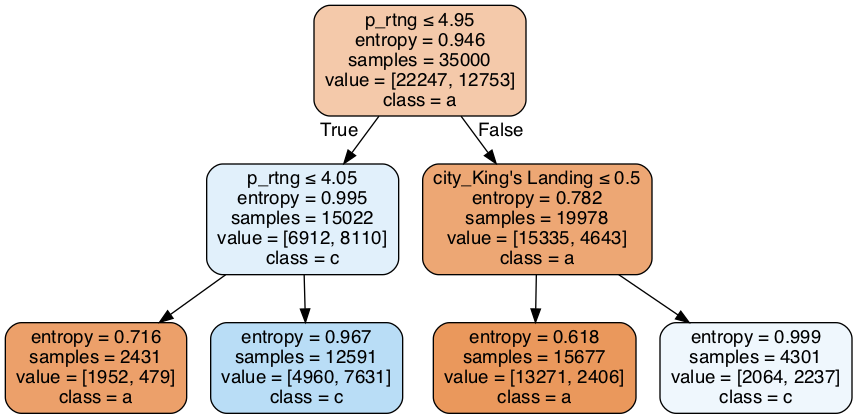

In [53]:
# Add graphics to understand which variables selected for Tree and parameter breaks!
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, special_characters=True,filled=True, rounded=True,
                        feature_names= feature_cols,  
                        class_names= 'active')
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

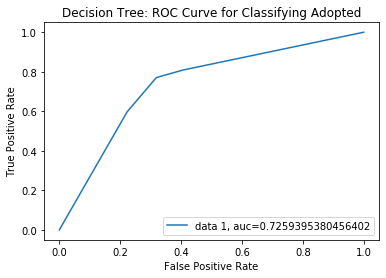

In [54]:
import numpy as np
# yp_pred # shows labels, not probabilities! how do we show probabilities?
probs = dtree.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
probs.round(decimals= 2)

fpr_p, tpr_p, prob_p = metrics.roc_curve(y_test, probs)   # Third argument should be probs, not Labels!!! Sarkar
auc = metrics.roc_auc_score(y_test, y_pred)               # But we get the same kinked curve as probs = 1.0 or 0.0
plt.plot(fpr_p,tpr_p,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Decision Tree: ROC Curve for Classifying Adopted")
plt.show()
# with an AUC of 0.73, this model appears to have some predictive power

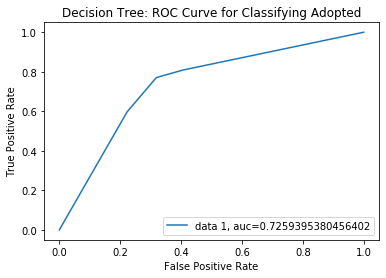

In [56]:
# Duplicated above, but removed _p (related to PHEV from Tesla notebook????)
import numpy as np
# yp_pred # shows labels, not probabilities! how do we show probabilities?
probs = dtree.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
probs.round(decimals= 2)

fpr, tpr, probs = metrics.roc_curve(y_test, probs)   # Third argument should be probs, not Labels!!! Sarkar
auc = metrics.roc_auc_score(y_test, y_pred)               # But we get the same kinked curve as probs = 1.0 or 0.0
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Decision Tree: ROC Curve for Classifying Adopted")
plt.show()
# with an AUC of 0.73, this model appears to have some predictive power

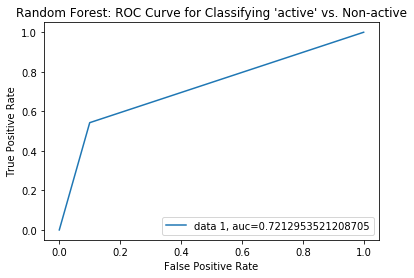

In [26]:
# Random Forest Classifier ...very close to Decision Tree

# Try a RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

# Limit max depth
forest = RandomForestClassifier(max_depth = 5, n_estimators= 5)

forest.fit(X_train,y_train)             # Train
y_pred_F = forest.predict(X_test)      # Predict the response for test dataset

fpr_p, tpr_p, prob_p = metrics.roc_curve(y_test, probs)   # Third argument should be probs, not Labels!!! Sarkar
auc = metrics.roc_auc_score(y_test, y_pred_F)               # But we get the same kinked curve as probs = 1.0 or 0.0
plt.plot(fpr_p,tpr_p,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Decision Tree: ROC Curve for Classifying Adopted")
plt.show()

In [27]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='warn')
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Logistic regression classifier on training set: 0.73
Accuracy of Logistic regression classifier on test set: 0.72


In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_F)        # Third argument should be probs, not Labels!!! Sarkar
auc = metrics.roc_auc_score(y_test, y_pred_F)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Random Forest: ROC Curve for Classifying 'active' vs. Non-active")
plt.show()

In [61]:
logreg.coef_   # Hmmm..confusing: for binary should be only one dummy, as the other is the base case !!!!

array([[-0.0392572 , -0.15698866,  0.02924494, -0.22185335,  0.00447609,
         0.11829229,  0.00117665, -0.75294536,  1.01108407, -0.2259488 ,
        -0.5655299 ,  0.59771981, -0.43451394,  0.46670385]])

In [62]:
X.columns

Index(['dist', 'p_rtng', 'd_rtng', 'surge', 'surge_pct', 'f_trips',
       'wkday_pct', 'city_Astapor', 'city_King's Landing', 'city_Winterfell',
       'phone_Android', 'phone_iPhone', 'b_user_False', 'b_user_True'],
      dtype='object')

In [65]:
print(zip(X.columns, logreg.coef_))

In [72]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logreg.coef_))], axis = 1)
coefficients.columns= ['Feature', 'Coefficient']
coefficients     # coefficients are the log odds: no idea of statistical significance unless use SNS package?

,Feature,Coefficient
0,dist,-0.039257
1,p_rtng,-0.156989
2,d_rtng,0.029245
3,surge,-0.221853
4,surge_pct,0.004476
5,f_trips,0.118292
6,wkday_pct,0.001177
7,city_Astapor,-0.752945
8,city_King's Landing,1.011084
9,city_Winterfell,-0.225949


In [28]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))


Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.75


In [29]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))



Accuracy of GNB classifier on training set: 0.72
Accuracy of GNB classifier on test set: 0.71


In [ ]:
# Support Vector Machine # Does not converge??
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))


# Logins

In [30]:
file=open('logins.json', 'r')
file_content=file.read()
file.close()
data= json.loads(file_content)
df_2= pd.DataFrame(data)

In [31]:
df_2.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [32]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null object
dtypes: object(1)
memory usage: 727.8+ KB


In [33]:
df_2['log']= pd.to_datetime(df_2.login_time)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 2 columns):
login_time    93142 non-null object
log           93142 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 1.4+ MB


In [34]:
df_2.head(10)

,login_time,log
0,1970-01-01 20:13:18,1970-01-01 20:13:18
1,1970-01-01 20:16:10,1970-01-01 20:16:10
2,1970-01-01 20:16:37,1970-01-01 20:16:37
3,1970-01-01 20:16:36,1970-01-01 20:16:36
4,1970-01-01 20:26:21,1970-01-01 20:26:21
5,1970-01-01 20:21:41,1970-01-01 20:21:41
6,1970-01-01 20:12:16,1970-01-01 20:12:16
7,1970-01-01 20:35:47,1970-01-01 20:35:47
8,1970-01-01 20:35:38,1970-01-01 20:35:38
9,1970-01-01 20:47:52,1970-01-01 20:47:52


In [35]:
df_2.set_index('log', inplace= True)


In [36]:
df_hourly= df_2.resample('H').count()


In [37]:
df_hourly =df_hourly.rename(columns = {'login_time':'freq'})

In [38]:
df_hourly["hours"] = df_hourly.index.hour

In [39]:
df_hourly['weekday']= df_hourly.index.weekday_name
#df["days"] = df_hourly.index.map(lambda x: x.strftime('%b-%d'))     

In [40]:
df_hourly.head()

,freq,hours,weekday
log,,,
1970-01-01 20:00:00,24,20,Thursday
1970-01-01 21:00:00,9,21,Thursday
1970-01-01 22:00:00,21,22,Thursday
1970-01-01 23:00:00,58,23,Thursday
1970-01-02 00:00:00,53,0,Friday


In [41]:
g= df_hourly.groupby(['hours','weekday']).freq.mean().round(0)
g # days ordered alphabetically, not chronologically!
df_g= pd.DataFrame(g)
piv_g = pd.pivot_table(df_g, values="freq",index=["hours"], columns=["weekday"], fill_value=0)
piv_g

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hours,,,,,,,
0,65,35,84,75,58,43,49
1,64,28,104,90,56,40,49
2,51,21,107,107,45,28,34
3,33,16,105,110,27,14,21
4,24,14,115,140,18,11,18
5,16,8,73,73,10,8,10
6,8,4,27,25,5,3,3
7,7,7,12,13,6,5,6
8,7,10,8,10,7,6,7


In [42]:
old_cols= list(piv_g.columns.values)
new_cols= ['Friday','Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday']

In [43]:
df_heat= piv_g[new_cols]

In [44]:
df_heat.head()

weekday,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday
hours,,,,,,,
0,65,84,75,35,43,49,58
1,64,104,90,28,40,49,56
2,51,107,107,21,28,34,45
3,33,105,110,16,14,21,27
4,24,115,140,14,11,18,18


In [45]:
df_heat_H= df_heat.T
df_heat_H

hours,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Friday,65,64,51,33,24,16,8,7,7,16,...,35,26,25,32,38,44,54,80,101,87
Saturday,84,104,107,105,115,73,27,12,8,8,...,51,51,48,43,43,46,47,58,77,67
Sunday,75,90,107,110,140,73,25,13,10,12,...,52,53,55,41,37,42,41,42,39,37
Monday,35,28,21,16,14,8,4,7,10,17,...,22,20,17,16,18,19,27,43,44,38
Tuesday,43,40,28,14,11,8,3,5,6,17,...,22,18,16,13,22,22,35,50,54,52
Wednesday,49,49,34,21,18,10,3,6,7,17,...,23,19,15,14,20,22,36,53,63,65
Thursday,58,56,45,27,18,10,5,6,7,18,...,28,20,17,17,25,28,41,58,73,69


In [46]:
print(df_heat_H) # Hmm...how to print ALL of it !! Perhaps as in cell #44 (not transposed)

hours      0    1    2    3    4   5   6   7   8   9  ...  14  15  16  17  18  \
weekday                                               ...                       
Friday     65   64   51   33   24  16   8   7   7  16 ...  35  26  25  32  38   
Saturday   84  104  107  105  115  73  27  12   8   8 ...  51  51  48  43  43   
Sunday     75   90  107  110  140  73  25  13  10  12 ...  52  53  55  41  37   
Monday     35   28   21   16   14   8   4   7  10  17 ...  22  20  17  16  18   
Tuesday    43   40   28   14   11   8   3   5   6  17 ...  22  18  16  13  22   
Wednesday  49   49   34   21   18  10   3   6   7  17 ...  23  19  15  14  20   
Thursday   58   56   45   27   18  10   5   6   7  18 ...  28  20  17  17  25   

hours      19  20  21   22  23  
weekday                         
Friday     44  54  80  101  87  
Saturday   46  47  58   77  67  
Sunday     42  41  42   39  37  
Monday     19  27  43   44  38  
Tuesday    22  35  50   54  52  
Wednesday  22  36  53   63  65  
Thursd

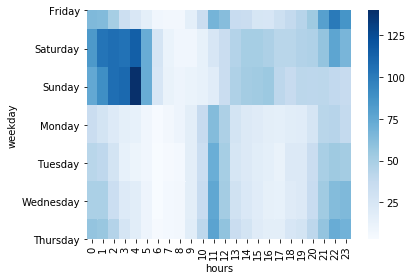

In [47]:
#plot pivot table as heatmap using seaborn
ax = sns.heatmap(df_heat_H, square= False, cmap= 'Blues') # False makes it square !!! inferno_r
plt.setp( ax.xaxis.get_majorticklabels(), rotation= 90 )  # , rotation=90
plt.tight_layout()
plt.show()

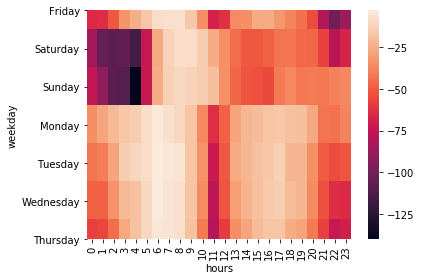

In [48]:
df_heat_HN= df_heat_H * -1
df_heat_HN.head() # OK
ax = sns.heatmap(df_heat_HN, square= False) # color is 'inferno_r' : _r reverses it from high to low!!
plt.setp( ax.xaxis.get_majorticklabels(), rotation= 90 )  # , rotation=90
plt.tight_layout()
plt.show()

In [ ]:
# Transpose

In [ ]:
g= df_hourly.groupby(['hours','weekday']).freq.mean().round(0)
g # days ordered alphabetically, not chronologically!
df_g= pd.DataFrame(g)
piv_gH = pd.pivot_table(df_g, values="freq",index=["weekday"], columns=["hours"], fill_value=0)
piv_gH

In [ ]:
# Plan B

In [ ]:
# create pivot table, days will be columns, hours will be rows
piv = pd.pivot_table(df_hourly, values="freq",index=["hours"], columns=["weekday"], fill_value=0)


In [ ]:
piv

In [ ]:
import seaborn as sns

In [ ]:
#plot pivot table as heatmap using seaborn
ax = sns.heatmap(piv, square=True)
plt.setp( ax.xaxis.get_majorticklabels(), rotation= 90 )  # , rotation=90
plt.tight_layout()
plt.show()

In [ ]:
# Hmmm..Not square, days not ordered, better if rotated on side, and darker colors higher intensity!

In [ ]:
df_2['hour']= df_2['log'].dt.hour                 # do need .dt !
df_2['weekday']= df_2['log'].dt.weekday_name
df_2.head()
df_2.tail()

In [ ]:
df_2.set_index('log', inplace= True)
dfheat= df_2.resample('H').count()


In [ ]:
dfheat.head()
dfheat

In [ ]:
dfheat.groupby(['hour','weekday'])


In [ ]:
df_2.log.resample("W")

In [ ]:
# df= pd.read_json(r'logins.json')
df= pd.read_json(r'C:/Users/user/Desktop/logins.json')
# C:\Users\Ron\Desktop\data.json

In [ ]:
%matplotlib inline
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# load json data as string and print keys.
json_string=json.load((open('logins.json')))
json_string[0].keys()

In [ ]:
This web site can tell you that there is a Nan somewhere in your json file.   https://jsonlint.com/
The workaround is to read it as a string then use json.loads (which handles nan) Example code below should work:

In [ ]:
file=open('ultimate_data_challenge.json', 'r')
file_content=file.read()
file.close()
data=json.loads(file_content)
df=pd.DataFrame(data)  # FileNotFoundError: [Errno 2] No such file or directory: 'logins.json'

In [ ]:
file=open('logins.json', 'r')
file_content=file.read()
file.close()
data=json.loads(file_content)
df=pd.DataFrame(data)    #. FileNotFoundError: [Errno 2] No such file or directory: 'logins.json'